<a href="https://colab.research.google.com/github/Amrutasutrave/colab_files/blob/main/Amruta_sutrave_test_bike_details_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv('/content/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
df.drop(['owner', 'name','seller_type'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      1061 non-null   int64  
 1   year               1061 non-null   int64  
 2   km_driven          1061 non-null   int64  
 3   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 33.3 KB


In [ ]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(),inplace=True)
df['ex_showroom_price'].unique()

array([  87958.71405751,  148114.        ,   89643.        ,
         53857.        ,   87719.        ,   60122.        ,
         78712.        ,   47255.        ,   95955.        ,
        351680.        ,   58314.        ,  117926.        ,
        132680.        ,   44389.        ,   53900.        ,
         56147.        ,   84751.        ,   61600.        ,
         79432.        ,   78350.        ,   71049.        ,
         57557.        ,  202310.        ,   71150.        ,
         56750.        ,   84042.        ,   69750.        ,
         59844.        ,   42859.        ,   73413.        ,
         49900.        ,   59422.        ,   57549.        ,
         51994.        ,   80350.        ,   54605.        ,
         88161.        ,   78513.        ,   50098.        ,
        195500.        ,   92074.        ,  164004.        ,
         74295.        ,   49642.        ,   51112.        ,
         53751.        ,   50267.        ,   61653.        ,
         70851.        ,

In [ ]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

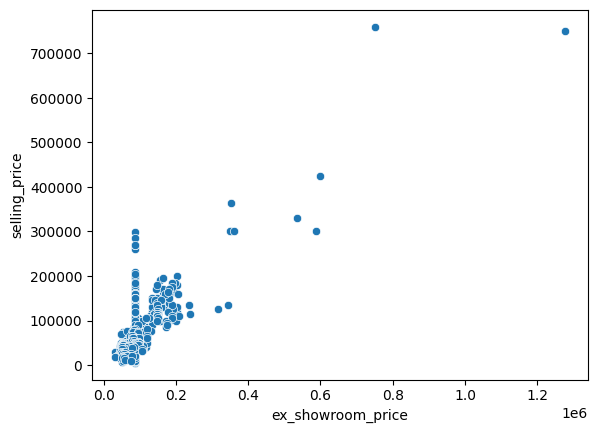

In [ ]:
plt.figure()
sns.scatterplot(data=df,y="selling_price",x="ex_showroom_price")
plt.show()

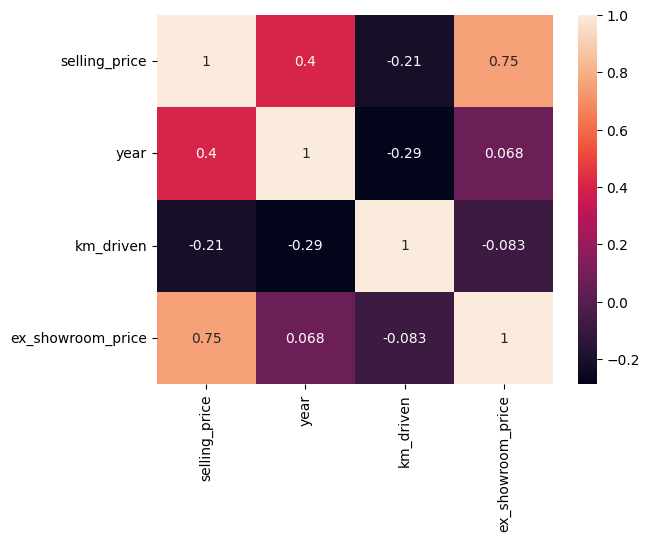

In [ ]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
X=df['selling_price']#feature
Y=df['ex_showroom_price']#target

In [ ]:
#split dataset into train & test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1 )

In [ ]:
#Linear Regression Model
lr=LinearRegression()

In [ ]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
#intercept
lr.intercept_

38280.641070804966

In [ ]:
#slope
lr.coef_

array([0.82796015])

In [ ]:
#calculating Ypredict
y_pred=lr.predict(np.array(x_train).reshape(-1,1))
y_pred

array([ 83818.44932713,  73054.96737564,  87958.25007771,  66431.28617472,
       158334.86283749, 108657.25383058,  58979.64482368,  63119.44557426,
        71399.04707541, 174894.06583979,  96237.85157886,  50700.04332253,
        67259.24632483,  87958.25007771,  71399.04707541,  87958.25007771,
       100377.65232943,  75538.84782598,  87958.25007771,  58979.64482368,
        78021.90031618, 145915.46058576,  71399.04707541,  67259.24632483,
        75538.84782598,  75538.84782598,  79678.64857656,  79678.64857656,
        50700.04332253,  69743.12677518,  59807.6049738 ,  63119.44557426,
        67259.24632483,  63119.44557426, 116936.85533173,  50700.04332253,
        58979.64482368, 659250.75365709,  92098.05082828, 100377.65232943,
        67259.24632483, 112797.05458116,  63119.44557426,  81334.56887679,
        67259.24632483,  83818.44932713,  75538.84782598,  96237.85157886,
        96237.85157886,  62705.4654992 , 141775.65983519,  58979.64482368,
        79678.64857656,  

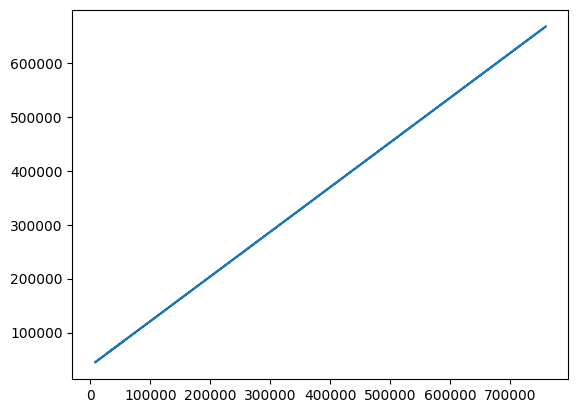

In [ ]:
#scatterplot
plt.figure()
plt.plot(x_train,y_pred)
plt.show()

In [ ]:
#testing
y_pred=lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([ 87958.25007771,  63119.44557426,  57323.72452345,  73054.96737564,
       104517.45308001,  87958.25007771,  58979.64482368,  79678.64857656,
        71399.04707541,  83818.44932713,  75538.84782598,  87958.25007771,
        63119.44557426,  54922.64008812,  82990.48917702,  79678.64857656,
        68914.33866491, 162474.66358806, 162474.66358806, 187313.46809151,
        48216.16287219,  54839.84407311,  67259.24632483,  87958.25007771,
        73054.96737564,  58151.68467357,  54839.84407311,  54839.84407311,
       116936.85533173, 129356.25758346,  79678.64857656,  44904.32227173,
        75538.84782598,  58979.64482368,  79678.64857656,  75538.84782598,
        69743.12677518, 100377.65232943, 170754.26508921, 101205.61247955,
        87958.25007771,  87958.25007771,  96237.85157886,  67259.24632483,
        58979.64482368,  79678.64857656, 125216.45683288,  61463.52527403,
        96237.85157886,  67259.24632483,  63119.44557426,  75538.84782598,
        64775.36587449,  

In [ ]:
#Envalvation of model
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)

977426273.2449028
31263.81731722636
21784.274010895228
0.4663354880496152


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      1061 non-null   int64  
 1   year               1061 non-null   int64  
 2   km_driven          1061 non-null   int64  
 3   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 33.3 KB


In [ ]:
x = df[['ex_showroom_price', 'year']].iloc[:2]
y = df['selling_price'].iloc[:2]

In [ ]:
x = df[['ex_showroom_price', 'year']].iloc[:1061]
y = df['selling_price'].iloc[:1061]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

-9757819.86594633

In [ ]:
lr.coef_

array([6.80052363e-01, 4.84539171e+03])

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([ 62797.39890009,  41234.01097944,  10756.28005071,  37124.04346086,
        96259.41268107,  64018.11151892,  65460.96955053,  50424.50757859,
        53765.58621151,  65460.96955053,  45123.48078109,  72488.18232852,
        30100.36951941,  29538.62764043,  84842.53640739,  70306.36126474,
        46079.40269366,  75151.75297896, 138727.32265264,  84842.53640739,
        26697.8358368 ,  24838.86026716,  49346.60595601,  65189.84174056,
        45522.06597407,  46079.40269366,  32421.40686175,  26697.8358368 ,
       119808.21002975, 144545.17061906,  68566.33897751,  17007.05240836,
        51375.93808868,  31543.22755101,  57714.04473993,  57583.49331326,
        64298.99177193,  72488.18232852,  79997.14469318,  64809.72972368,
        59322.38720573,  75744.25441605,  -7219.90616272,  44636.54466205,
        36388.61926523,  84842.53640739, 134854.38719063,  36388.61926523,
        74988.73486768,  46079.40269366,  43827.3382311 ,  30164.31306859,
        75151.75297896,  

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)

732165328.6381075
27058.553705586473
18608.579932227058
0.6555548186324953


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf=PolynomialFeatures(2)

In [ ]:
x=df[['ex_showroom_price','year']]
y=df[['selling_price']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train_poly=pf.fit_transform(x_train)    # fit_transform ----> training datas
x_test_poly=pf.transform(x_test)

In [ ]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_poly)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)

647190344.3463306
25439.93601301565
17244.72364275732
0.695531068164176


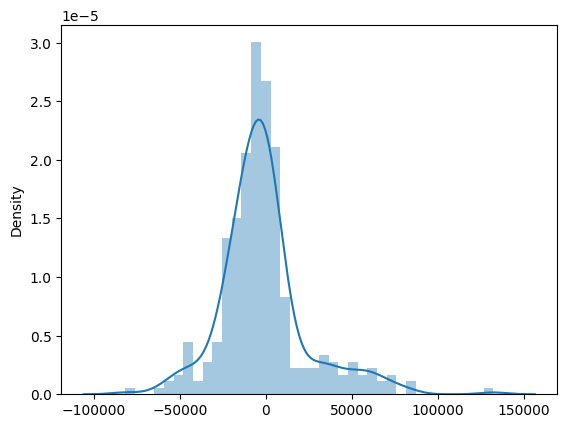

In [ ]:
resid = y_test-y_pred
plt.figure()
sns.distplot(resid)
plt.show()